In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re
import string
from re import sub
import seaborn as sns
from bs4 import BeautifulSoup

In [79]:
data = pd.read_csv('cleaned_tweet_data.csv', encoding='utf-8')

In [80]:
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie


In [63]:
data.shape

(5320, 15)

## Data Preprocessing

In [64]:
data.isnull().sum()

created_at               0
source                   0
original_text            0
polarity                 0
subjectivity             0
lang                     0
favourite_count          0
retweet_count            0
original_author          0
followers_count          0
friends_count            0
possibly_sensitive    1424
hashtags                 0
user_mentions            0
place                  121
dtype: int64

In [59]:
# data.dropna(axis = 1, inplace = True)

In [81]:
data['LENGTH'] = data['original_text'].apply(lambda x:len(str(x).split())) 

data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6


In [82]:
# Get the Min, Max and Average text length

len_min, len_max, len_avg = min(data['LENGTH']), max(data['LENGTH']), round(sum(data['LENGTH'])/len(data['LENGTH']))
print('The min {}, max {}, and avg {} features for training .'.format(len_min, len_max, len_avg))

The min 3, max 59, and avg 25 features for training .


#### 1. Remove Newlines and Tabs

In [83]:
def remove_newlines_tabs(text):
    """
    This function will remove all the occurrences of newlines, tabs, and combinations like: \\n, \\.
    
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after removal of newlines, tabs, \\n, \\ characters.
        
    Example:
    Input : This is her \\ first day at this place.\n Please,\t Be nice to her.\\n
    Output : This is her first day at this place. Please, Be nice to her. 
    
    """
    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = str(text).replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ')
    return Formatted_text

In [84]:
data["preprocessed"] = data['original_text'].apply(lambda text: remove_newlines_tabs(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,Watch the video of the beginning of the Chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,#Pelosi #Taipei #taiwan #XiJinping #China ...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,#Pelosi #china China Time ✌️ https://t.co/tEDj...


#### 2. Strip HTML Tags

In [85]:
def strip_html_tags(text):
    """ 
    This function will remove all the occurrences of html tags from the text.
    
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after removal of html tags.
        
    Example:
    Input : This is a nice place to live. <IMG>
    Output : This is a nice place to live.  
    """
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [86]:
data["preprocessed"] = data["preprocessed"].apply(lambda text: strip_html_tags(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,Watch the video of the beginning of the Chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,#Pelosi #Taipei #taiwan #XiJinping #China ...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,#Pelosi #china China Time ✌️ https://t.co/tEDj...


#### 3. Remove Links

In [87]:
def remove_links(text):
    """
    This function will remove all the occurrences of links.
    
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after removal of all types of links.   
    
    """
    
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [88]:
data["preprocessed"] = data["preprocessed"].apply(lambda text: remove_links(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,Watch the video of the beginning of the Chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,#Pelosi #Taipei #taiwan #XiJinping #China ...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,#Pelosi #china China Time ✌️


#### 4. Remove Whitespaces

In [89]:
def remove_whitespace(text):
    """ This function will remove 
        extra whitespaces from the text
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after extra whitespaces removed .
        
    Example:
    Input : How   are   you   doing   ?
    Output : How are you doing ?     
        
    """
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text

In [90]:
data["preprocessed"] = data["preprocessed"].apply(lambda text: remove_whitespace(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,#Pelosi airplane landed safely in #Taiwan 🇹🇼 1...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,Watch the video of the beginning of the Chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,#Pelosi #Taipei #taiwan #XiJinping #China On a...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,#Pelosi #china China Time ✌️


#### 5. Case Conversion / Lower casing

In [91]:
def lower_casing_text(text):
    
    """
    The function will convert text into lower case.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
         value: text in lowercase
         
    Example:
    Input : The World is Full of Surprises!
    Output : the world is full of surprises!
    
    """
    # Convert text to lower case
    # lower() - It converts all upperase letter of given string to lowercase.
    text = text.lower()
    return text

In [92]:
data["preprocessed"] = data["preprocessed"].apply(lambda text: lower_casing_text(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,#pelosi airplane landed safely in #taiwan 🇹🇼 1...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,watch the video of the beginning of the chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,#pelosi #taipei #taiwan #xijinping #china on a...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,#hobipalooza #laacademiaexpulsion #weuro2022 #...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,#pelosi #china china time ✌️


#### 6. Remove Special Characters

In [93]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


In [94]:
data["preprocessed"] = data["preprocessed"].apply(lambda text: remove_punctuation(text))
#datatrain["preprocessedAns"] = datatrain["preprocessedAns"].apply(lambda text: remove_newlines_tabs(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,pelosi airplane landed safely in taiwan 🇹🇼 1 ...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,watch the video of the beginning of the chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,pelosi taipei taiwan xijinping china on a verg...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,hobipalooza laacademiaexpulsion weuro2022 jhop...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,pelosi china china time ✌️


#### 7. Remove Stopwords

In [95]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [96]:
data["preprocessed"] = data["preprocessed"].apply(lambda text: remove_stopwords(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,pelosi airplane landed safely taiwan 🇹🇼 1 🇨🇳 🇺...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,watch video beginning chinese bombing taiwan p...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,pelosi taipei taiwan xijinping china verge ano...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,hobipalooza laacademiaexpulsion weuro2022 jhop...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,pelosi china china time ✌️


#### 8. Stemming / Text Normalization

In [97]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])


In [98]:
data["preprocessed"] = data["preprocessed"].apply(lambda text: stem_words(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,pelosi airplan land safe taiwan 🇹🇼 1 🇨🇳 🇺🇸 pla...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,watch video begin chines bomb taiwan pelosi vi...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,pelosi taipei taiwan xijinp china verg anoth war
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,hobipalooza laacademiaexpuls weuro2022 jhopeat...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,pelosi china china time ✌️


#### 9. Lemmatization / Text Normalization

In [99]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [100]:
data["preprocessed"] = data["preprocessed"].apply(lambda text: lemmatize_words(text))
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,LENGTH,preprocessed
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,43,pelosi airplan land safe taiwan 🇹🇼 1 🇨🇳 🇺🇸 pla...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,0,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN,28,watch video begin chine bomb taiwan pelosi vis...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,0,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,12,pelosi taipei taiwan xijinp china verg anoth war
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef,13,hobipalooza laacademiaexpuls weuro2022 jhopeat...
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,0,0,Mohamme65404115,39,206,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,6,pelosi china china time ✌️


# Exploratory Data Analysis

In [101]:
def condition(x):
    if x > 0:
        return "positive"
    elif x == 0:
        return "neutral"
    else:
        return 'negative'

In [102]:
dt = data["preprocessed"]
data["clean"] = dt.values

In [103]:
data['sentiment'] = data['polarity'].apply(condition)

In [104]:
print("Document Count")
print(data.groupby('sentiment')['preprocessed'].count())

print("Word Count")
print(data.groupby('sentiment').apply(lambda x: x.preprocessed.apply(lambda x: len(x.split())).sum()))

Document Count
sentiment
negative     896
neutral     2188
positive    2236
Name: preprocessed, dtype: int64
Word Count
sentiment
negative    16116
neutral     30448
positive    41692
dtype: int64


C:\Users\hp\anaconda3\envs\Excell-Chatbot\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


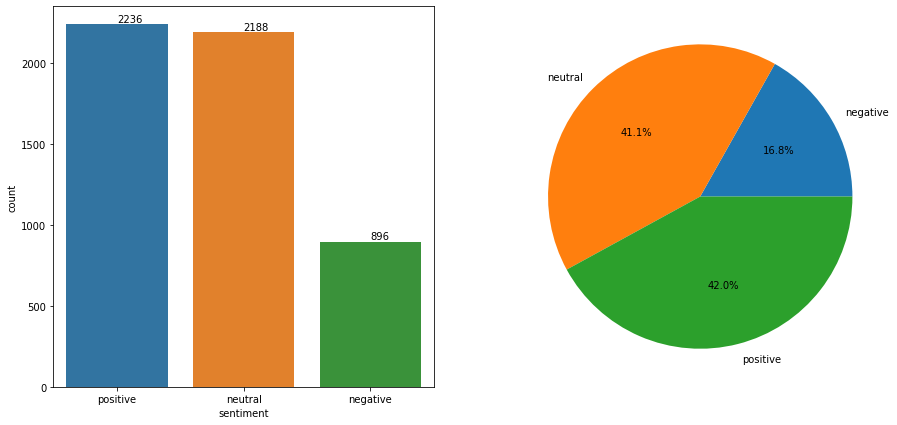

In [105]:
#Checking for data imbalance

# Function to print height of barcharts on the bars
def barh(ax):
    
    for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() + 15 #y-position
        ax.annotate(round(val,2),(x,y))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.countplot(data['sentiment'])
barh(ax)
labels = ['negative', 'neutral', 'positive']
plt.subplot(1,2,2)
plt.pie(data.groupby(['sentiment']).count()['preprocessed'],labels=labels, autopct='%1.1f%%')

plt.show()


In [106]:
# Filter negative tweets
negative_tweets = data[data.sentiment == 'negative']


In [107]:
data.to_csv('csvfile_global_twitter_processed.csv', encoding='utf-8', index=False)